In [27]:
import torch
import numpy as np

# Tensor Initialization #

## Directly from data ##

它将Python列表data转换为张量x_data<br/>这段代码的功能是创建了一个2x2的张量x_data，其中包含了[[1, 2], [3, 4]]这个数据

In [5]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

## From a NumPy array ##

这段代码的功能是将Python列表data转换为NumPy数组np_array，然后将NumPy数组转换为PyTorch张量x_np

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

## From another tensor ##

x_ones = torch.ones_like(x_data)：这行代码创建了一个与x_data张量具有相同形状的张量x_ones，其中所有元素的值都设为1。

x_rand = torch.rand_like(x_data, dtype=torch.float)：这行代码创建了一个与x_data张量具有相同形状的张量x_rand，但其中的值是在0到1之间的随机数。

In [7]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9162, 0.8121],
        [0.5091, 0.3366]]) 



## With random or constant values ##

shape = (2, 3,)：这行代码定义了一个元组shape，其中包含了张量的形状信息。在这个例子中，形状为2行3列

In [8]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3554, 0.4566, 0.3081],
        [0.5465, 0.2611, 0.8062]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Tensor Attributes #

这行代码创建了一个形状为(3, 4)的随机张量tensor。torch.rand()函数用于创建指定形状的张量，并用0到1之间的随机数填充。

In [9]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Tensor Operations #

这行代码将张量tensor移动到GPU上进行计算。

In [28]:
torch.cuda.is_available()

True

In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


## Standard numpy-like indexing and slicing ##

这段代码使用了PyTorch库创建了一个4x4的张量（tensor），并将其所有元素初始化为1。然后，通过索引操作，将张量的第二列（索引为1的列，Python中索引从0开始）的所有元素设置为0。最后，打印输出了修改后的张量

In [12]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


这段代码使用了PyTorch库中的torch.cat()函数，该函数用于沿指定维度拼接张量。给定的张量列表是[tensor, tensor, tensor]，即将tensor张量在水平方向（dim=1，即列的方向）上连接三次。假设初始的tensor是一个4x4的张量，那么沿着列的方向连接三次就会得到一个4x12的张量。

In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [14]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Multiplying tensors ##

两种写法都会得到一个新的张量，其中每个元素是对应位置上两个原始张量对应位置上元素的乘积。

In [15]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


这段代码使用了PyTorch库中的矩阵乘法操作，计算了一个张量与其转置矩阵的矩阵乘积。

In [16]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [17]:
print(tensor, "\n")
tensor.add_(5) #函数名以_结尾的操作通常表示这是一个原地操作，也就是说，该操作会直接修改原始张量的数值而不返回新的张量。在这里，add_()函数执行了原地加法操作。
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# Bridge with NumPy #

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

# Tensor to NumPy array #

In [18]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# NumPy array to Tensor #

In [20]:
n = np.ones(5)
t = torch.from_numpy(n)

In [21]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# A Gentle Introduction to torch.autograd #

In [31]:
!pip install torchvision

/var/lib/oar/.batch_job_bashrc: line 5: /home/ziwang/.bashrc: No such file or directory


In [32]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

# 创建了一个ResNet-18模型的实例，并指定了使用默认的预训练权重。
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# data = torch.rand(1, 3, 64, 64): 创建了一个形状为(1, 3, 64, 64)的随机张量，表示输入数据。
# 这个张量的形状是(batch_size, channels, height, width)，对应于一批大小为1的RGB图像，每个图像的尺寸为64x64。
data = torch.rand(1, 3, 64, 64) 

# 创建了一个形状为(1, 1000)的随机张量，表示模型的输出标签。这个张量的形状是(batch_size, num_classes)，对应于模型输出的概率分布，其中包含了1000个类别的预测概率。
labels = torch.rand(1, 1000)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ziwang/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
52.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



接下来，我们将输入数据通过模型的每一层进行预测。这就是前向传递。

In [33]:
prediction = model(data) # forward pass

我们使用模型的预测结果和相应的标签来计算误差（损失）。下一步是通过网络反向传播误差。当我们在误差张量上调用 .backward() 时，反向传播就开始了。
然后，Autograd 会计算每个模型参数的梯度，并存储在参数的 .grad 属性中。

In [34]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

接下来，我们加载一个优化器，在本例中，SGD 的学习率为 0.01，动量为 0.9。我们在优化器中注册模型的所有参数。

In [35]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

最后，我们调用 .step() 启动梯度下降。优化器会根据 .grad 中存储的梯度调整每个参数。

In [36]:
optim.step() #gradient descent

# Neural Networks #

A typical training procedure for a neural network is as follows:

Define the neural network that has some learnable parameters (or weights)

Iterate over a dataset of inputs

Process input through the network

Compute the loss (how far is the output from being correct)

Propagate gradients back into the network’s parameters

Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

神经网络的典型训练过程如下：

定义具有某些可学习参数（或权重）的神经网络

对输入数据集进行迭代

通过网络处理输入

计算损失（输出离正确还有多远）

将梯度传回网络参数中

更新网络权重，通常使用简单的更新规则：权重 = 权重 - 学习率 * 梯度

## Define the network ##

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定义了一个名为Net的类，它是nn.Module类的子类，表示这是一个神经网络模型。
class Net(nn.Module):

    # 这是Net类的构造函数，用于初始化模型的各个层。
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # 第一个参数是输入通道数，第二个参数是输出通道数，第三个参数是卷积核的大小。
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        # 这三行代码定义了三个全连接层。nn.Linear表示线性变换，第一个参数是输入特征数，第二个参数是输出特征数。
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # 前向传播函数
    def forward(self, x):
        # Max pooling over a (2, 2) window 这两行代码进行了卷积层后的最大池化操作，用于提取特征并降低维度。
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension 将输入张量展平，保留批次维度。
        
        #这三行代码应用了ReLU激活函数和线性变换来处理全连接层的输出
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [38]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1的权重是一个四维张量，形状为[6, 1, 5, 5]。这表示有6个输出通道、1个输入通道，每个通道使用大小为5x5的卷积核。

10
torch.Size([6, 1, 5, 5])


In [39]:
input = torch.randn(1, 1, 32, 32) #这表示一个包含一个样本的批次，每个样本有一个通道，并且是 32x32 的图像
out = net(input)
print(out) #输出结果 out，它是一个大小为 (1, 10) 的张量。每个元素表示对应类别的预测分数。

tensor([[ 0.0083, -0.0866,  0.0888, -0.0644, -0.0777,  0.0448,  0.0930,  0.0096,
         -0.0385, -0.0977]], grad_fn=<AddmmBackward0>)


In [40]:
net.zero_grad() #zero_grad() 来清除之前的梯度，以避免梯度的累积影响下一次的计算。
out.backward(torch.randn(1, 10))

torch.nn 仅支持迷你批次。整个 torch.nn 软件包只支持迷你样本批次的输入，而不支持单个样本的输入。

例如，nn.Conv2d 将接收 nSamples x nChannels x Height x Width 的 4D 张量。

如果只有单个样本，只需使用 input.unsqueeze(0) 添加一个假的批次维度即可。

## Loss Function ##

损失函数接收（输出、目标）这对输入，并计算出一个值来估计输出与目标之间的距离。

nn 软件包中有几种不同的损失函数。一个简单的损失函数是：nn.MSELoss，它计算输出与目标之间的均方误差。

例如

In [41]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss() # 表示均方误差损

loss = criterion(output, target)
print(loss)

tensor(1.5286, grad_fn=<MseLossBackward0>)


In [42]:
# MSELoss 这行代码打印了损失函数的反向传播函数，即均方误差损失函数 MSELoss。
print(loss.grad_fn)  

# 这行代码通过 next_functions 访问了损失函数计算过程中的下一级函数。由于均方误差损失函数是通过 output 和 target 计算得到的，
# 因此 next_functions 中的第一个元素对应于 output，即模型的输出。因为我们的模型最后一层是全连接层 Linear，所以这里打印出来的是 Linear 函数。
print(loss.grad_fn.next_functions[0][0])  # Linear 

# 这行代码进一步访问了损失函数计算过程中下一级的函数。在这里，我们进入了全连接层 Linear 的计算过程。
# 在全连接层中，输入经过线性变换后会被传递给激活函数，而在我们的模型中，激活函数是 ReLU。所以这里打印出来的是 ReLU 函数。
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## BackProp ##

要反向传播错误，我们只需 loss.backward()。不过您需要清除现有的梯度，否则梯度将累积到现有梯度中。

In [43]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0188,  0.0033,  0.0204,  0.0176, -0.0043,  0.0171])


## Update the weights ##

实际应用中最简单的更新规则是随机梯度下降法（SGD)

weight = weight - learning_rate * gradient

In [44]:
# 梯度下降的迭代过程，从而使模型的参数朝着损失函数减小的方向更新。
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

不过，由于使用的是神经网络，因此需要使用各种不同的更新规则，如 SGD、Nesterov-SGD、Adam、RMSProp 等。为此，我们开发了一个小软件包：torch.optim，用于实现所有这些方法。使用它非常简单：

In [45]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Training a Classifier #

## Training an image classifier ##

我们将依次执行以下步骤:

- 使用 torchvision 加载 CIFAR10 训练数据集和测试数据集并将其标准化
- 定义卷积神经网络
- 定义损失函数
- 在训练数据上训练网络
- 在测试数据上测试网络

### 1. Load and normalize CIFAR10 ###

In [46]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision 数据集的输出是范围为 [0, 1] 的 PILImage 图像。我们将其转换为归一化范围为 [-1, 1] 的张量。

In [47]:
transform = transforms.Compose( # 创建了一个转换组合，将一系列的数据预处理操作组合在一起。这里使用了两个预处理操作
    [transforms.ToTensor(), # 将图像转换为 PyTorch 张量，并将像素值缩放到 [0, 1] 的范围
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 对图像进行标准化处理，减去均值（0.5）并除以标准差（0.5）

batch_size = 4 #指定了数据加载器每次加载的批次大小，这里设置为 4。

# 创建了 CIFAR-10 数据集的训练集对象。root 参数指定了数据集存储的根目录，train=True 表示加载训练集，
# download=True 表示如果数据集不存在则自动下载，transform=transform 表示应用之前定义的数据预处理操作。
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# 创建了一个训练集数据加载器。trainloader 负责从训练集中加载数据，shuffle=True 表示每个 epoch 都会对数据进行洗牌，
# num_workers=2 表示使用两个子进程来加载数据以加快速度。
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# 这里分别创建了 CIFAR-10 数据集的测试集对象和测试集数据加载器。
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

57.9%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


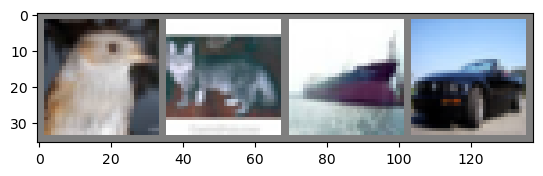

bird  cat   ship  car  


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

# 在显示之前，需要进行反标准化操作，即将图像的像素值从 [-1, 1] 的范围还原到 [0, 1] 的范围，
# 然后将张量转换为 NumPy 数组，并进行维度转置
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()


# get some random training images
dataiter = iter(trainloader) #创建了一个迭代器 dataiter，用于从训练集数据加载器中迭代获取数据。
images, labels = next(dataiter) #从迭代器中获取了一批数据，其中 images 是图像数据，labels 是对应的标签。

# show images
imshow(torchvision.utils.make_grid(images)) #用于将一批图像组合成一个网格，方便显示
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. Define a Convolutional Neural Network ###

In [49]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3.Define a Loss function and optimizer ###

In [52]:
import torch.optim as optim

#这行代码定义了损失函数，即交叉熵损失函数。交叉熵损失函数通常用于多类别分类问题
criterion = nn.CrossEntropyLoss()

#这行代码定义了优化器，即随机梯度下降（SGD）优化器。SGD是一种常用的优化算法，用于更新神经网络的权重以最小化损失函数。
#lr=0.001指定了学习率，即每次更新时的步长。momentum=0.9是SGD的一个超参数，用于加速SGD在相关方向上前进，并减小波动。
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4.Train the network ###

In [ ]:
# for epoch in range(2):：这是一个外部循环，用于迭代整个数据集多次，每次称为一个"epoch"。
# 在这个示例中，数据集将被遍历两次。
for epoch in range(2):  # loop over the dataset multiple times

    # 初始化一个变量running_loss，用于跟踪每个epoch中的累积损失。
    running_loss = 0.0

    #这是一个内部循环，用于遍历训练数据加载器trainloader中的每个批次
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # 解压批次数据，将输入和对应的标签分别赋给inputs和labels变量。
        inputs, labels = data

        # zero the parameter gradients
        # 将输入数据inputs通过神经网络net进行前向传播，得到输出。
        optimizer.zero_grad()

        #损失函数criterion计算模型预测值outputs与真实标签labels之间的损失。
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        #调用backward()方法进行反向传播，计算损失对模型参数的梯度。
        loss.backward()
        optimizer.step()

        # print statistics
        #累积当前批次的损失到running_loss变量中。
        running_loss += loss.item()

        #每遍历2000个批次（mini-batches），打印一次损失。这个条件用于控制打印频率。
        if i % 2000 == 1999:    # print every 2000 mini-batches

            #打印当前epoch和批次数，以及当前2000个mini-batches的平均损失。
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

            #重置running_loss，以便计算下一个2000个mini-batches的损失。
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.168
[1,  4000] loss: 1.840
[1,  6000] loss: 1.660
[1,  8000] loss: 1.580
[1, 10000] loss: 1.525
[1, 12000] loss: 1.468
[2,  2000] loss: 1.417
[2,  4000] loss: 1.376
[2,  6000] loss: 1.363
[2,  8000] loss: 1.345
[2, 10000] loss: 1.304


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5. Test the network on the test data ###

In [ ]:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data